<a href="https://colab.research.google.com/github/FrankfurtOceanic/ProtoRes/blob/main/ProtoRes_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 1. Prototype Layer

We implement it on the basis that $x_{in} \in \mathbb{R}^{N \times E_{in}} $

In [16]:
class ProtoLayer(layers.Layer):
  def __init__(self):
    super(ProtoLayer, self).__init__()

  def call(self, inputs):
    return tf.reduce_mean(inputs, axis=1)


Small Test

In [ ]:
x = [[1,2,3], [3,4,5], [5,6,7]]

ProtoLayer(x)

array([2., 4., 6.])

# 2. Residual Block

I simplified the fully connected units. Alternatively, you can implement user specified number of units.

In [11]:
def ResBlock(xin, hiddenUnits, L=1,): #contains the logic for the first residual loop
  if L<1 : 
    L=1
    print("L must be greater than 0, 1 will be used instead")
  h = layers.Dense(hiddenUnits, activation="relu", use_bias=True)(xin)
  for i in range(2,L+1):
    h = layers.Dense(hiddenUnits, activation="relu", use_bias=True)(h)
  
  Lx = layers.Dense(hiddenUnits, activation=None, use_bias=False)(xin) #Could decide not to use an activation
  
  addition = layers.Add()([Lx, h]) #alternatively, they could be concatenated instead
  b = layers.ReLU()(addition)
  
  f = layers.Dense(hiddenUnits, activation=None, use_bias=False)(h)
  return b, f

# 3. Encoder Block

In [14]:
def EncoderBlock(xin, R, innerHiddenUnits, FCLayers):
  if R<1 : 
    R=1
    print("The number of R Blocks must be greater than 0, 1 will be used instead")
  
  #First iteration
  
  r = 1

  b, f = ResBlock(xin, innerHiddenUnits, FCLayers)

  p = ProtoLayer()(f) #for p1, there is no prior p so its simply Protolayer(f1)

  xr = layers.ReLU()((b-1)/(r-1)*p)
  r+=1
  #subsequent iterations
  for i in range(2,R+1):
    b, f = ResBlock(xr, innerHiddenUnits, FCLayers)
    p = p + ProtoLayer()(f)

    xr = layers.ReLU()((b-1)/(r-1)*p)
    r +=1

  #output
  return p


# 4. Actual Model

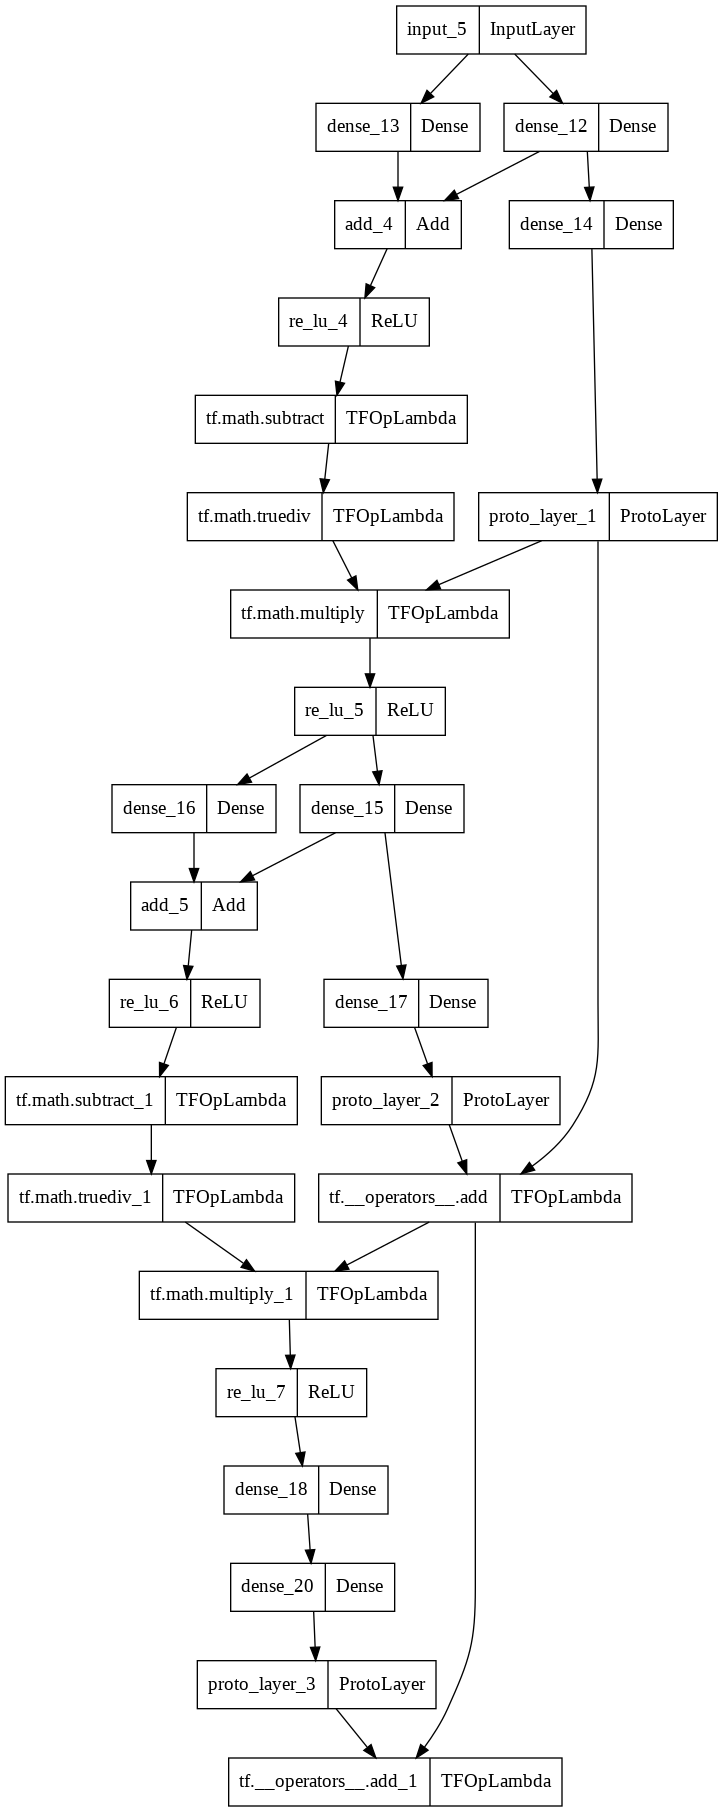

In [17]:
inputs = keras.Input(shape=(10,9))
outputs = EncoderBlock(inputs, 3, 3, 1)


model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

keras.utils.plot_model(model, "my_first_model.png")